In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the Data

In [2]:
data = pd.read_csv('50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
r_square_value = pd.DataFrame(columns = ['Model' , 'R_Square_value' , 'AIC'])

## EDA

In [4]:
data.shape

(50, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


+ No Null points are present 
+ All data types are correct
+ There is one column contain Categorical values so we have to convert it first to numeric

In [6]:
#Checking for duplicate values
data[data.duplicated()]

,R&D Spend,Administration,Marketing Spend,State,Profit


+ No Duplicate values are present

In [7]:
# Copy the data
data1 = data.copy()
data1.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [8]:
#Converting Categorical values to numeric by Label Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(data['State'])
data1['State'] = label
data1.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [9]:
label_class = le.classes_
label_class

array(['California', 'Florida', 'New York'], dtype=object)

In [10]:
# Correlation Matrix
data1.corr()

,R&D Spend,Administration,Marketing Spend,State,Profit
R&D Spend,1.000000,0.241955,0.724248,0.104685,0.972900
Administration,0.241955,1.000000,-0.032154,0.011847,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.077670,0.747766
State,0.104685,0.011847,0.077670,1.000000,0.101796
Profit,0.972900,0.200717,0.747766,0.101796,1.000000


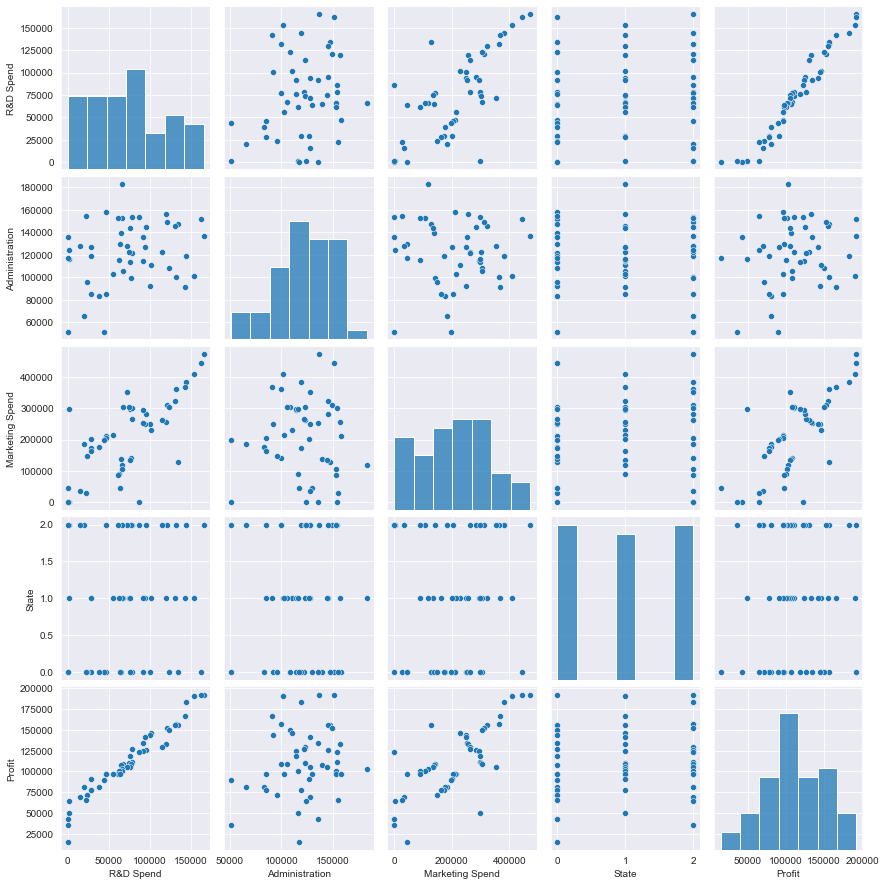

In [11]:
# Pair plot
sns.set_style(style = 'darkgrid')
sns.pairplot(data1)

+ From the plot and correlation matrix we have observed that there is less correlation between profit and Administration
+ And there is good correlation between R&D Spend and Marketing Spend 
+ The above two correlation is not benificial for our Model So we have to focus on that.


In [12]:
#Rename the column
data2 = data1.rename({'R&D Spend':'Research_Spend' , 'Marketing Spend':'Market_Spend'} , axis = 1)

## Build 1st Model

In [13]:
data2.head()

,Research_Spend,Administration,Market_Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [14]:
import statsmodels.formula.api as smf

model0 = smf.ols('Profit ~ Research_Spend+Administration+Market_Spend+State', data = data2).fit()


In [15]:
#Model Summary
model0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Tue, 07 Jun 2022   Prob (F-statistic):           8.51e-29
Time:                        15:17:44   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.014e+04   6804.555      7.369      0.000    3.64e+04    6.38e+04
Research_Spend     0.8058      0.046     17.609      0.000       0.714       0.898
Administration    -0.0268      0.052     -0.520      0.606      -0.131       0.077
Market_Spend       0.0272      0.017      1.637      0.109      -0.006       0.061
State            -22.3206   1609.829     -0.014      0.989   -3264.682    3220.041
==============================================================================
Omnibus:                       14.864   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.542
Skew:                          -0.949   Prob(JB):                     2.10e-05
Kurtosis:                       5.596   Cond. No.                     1.44e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
dt = {'Model': ['Model0'] , 'R_Square_value':[model0.rsquared] , 'AIC':[model0.aic]}
r_square_value = pd.DataFrame(dt)

In [17]:
r_square_value

,Model,R_Square_value,AIC
0,Model0,0.950746,1060.771285


In [18]:
#r_square_value.loc[1] = ['model' , 0.97 , 1000]

In [19]:
data2.head()

,Research_Spend,Administration,Market_Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


### SLR Model only for State and Administration and checking for Market_Spend

In [20]:
ml_Ad = smf.ols('Profit~Administration' , data = data2).fit()
ml_Ad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Tue, 07 Jun 2022   Prob (F-statistic):              0.162
Time:                        15:17:44   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Administration     0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
ml_St = smf.ols('Profit~State' , data = data2).fit()
ml_St.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5026
Date:                Tue, 07 Jun 2022   Prob (F-statistic):              0.482
Time:                        15:17:44   Log-Likelihood:                -600.39
No. Observations:                  50   AIC:                             1205.
Df Residuals:                      48   BIC:                             1209.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.071e+05   9005.386     11.891      0.000     8.9e+04    1.25e+05
State       4925.6356   6947.806      0.709      0.482   -9043.865    1.89e+04
==============================================================================
Omnibus:                        0.023   Durbin-Watson:                   0.045
Prob(Omnibus):                  0.989   Jarque-Bera (JB):                0.134
Skew:                           0.047   Prob(JB):                        0.935
Kurtosis:                       2.765   Cond. No.                         2.91
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

+ As we can see that the R-Square value of Above model is very less(i.e. 0.04 for Model(Profit-Administration) and 0.01 for Model(Profit-State).
+ So it is one reason to drop this two column

In [22]:
ml_MS = smf.ols('Profit~Market_Spend' , data = data2).fit()
ml_MS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Tue, 07 Jun 2022   Prob (F-statistic):           4.38e-10
Time:                        15:17:44   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept         6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
Market_Spend     0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

+ We can not ignore 'Market_Spend' as it has high value of R-Square

### Taking Both features together and making the model

In [23]:
ml_Ad_St = smf.ols('Profit~Administration+State' , data = data2).fit()
ml_Ad_St.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     1.241
Date:                Tue, 07 Jun 2022   Prob (F-statistic):              0.298
Time:                        15:17:44   Log-Likelihood:                -599.37
No. Observations:                  50   AIC:                             1205.
Df Residuals:                      47   BIC:                             1210.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.237e+04   2.63e+04      2.752      0.008    1.95e+04    1.25e+05
Administration     0.2871      0.205      1.404      0.167      -0.124       0.699
State           4811.2496   6879.140      0.699      0.488   -9027.795    1.87e+04
==============================================================================
Omnibus:                        0.187   Durbin-Watson:                   0.110
Prob(Omnibus):                  0.911   Jarque-Bera (JB):                0.302
Skew:                           0.132   Prob(JB):                        0.860
Kurtosis:                       2.726   Cond. No.                     5.78e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.78e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

+ As we can see that both features(Administration and State) together have R-Square value equale to 0.05. It is less so we can say that they dont make any significant change in the Model.

### Calculating Variation Inflation Factor (VIF)

In [24]:
data2.head()

,Research_Spend,Administration,Market_Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [25]:
rsq_rs = smf.ols('Research_Spend~Administration+Market_Spend+State' , data = data2).fit().rsquared
vif_rs = 1/(1-rsq_rs)
vif_rs

2.48117810664151

In [26]:
rsq_ad = smf.ols('Administration~Research_Spend+Market_Spend+State' , data = data2).fit().rsquared
vif_ad = 1/(1-rsq_ad)
vif_ad

1.1753153231430187

In [27]:
rsq_ms = smf.ols('Market_Spend~Research_Spend+Administration+State' , data = data2).fit().rsquared
vif_ms = 1/(1-rsq_ms)
vif_ms

2.326780136936846

In [28]:
rsq_st = smf.ols('State~Research_Spend+Administration+Market_Spend' , data = data2).fit().rsquared
vif_st = 1/(1-rsq_st)
vif_st

1.0112807816962477

In [29]:
dt = {'Variables':['Research_Spend','Administration','Market_Spend','State'] , 'VIF_Value' :[vif_rs , vif_ad , vif_ms , vif_st]}
VIF_df = pd.DataFrame(dt)
VIF_df

,Variables,VIF_Value
0,Research_Spend,2.481178
1,Administration,1.175315
2,Market_Spend,2.326780
3,State,1.011281


+ As we can see that the collinearity between Research_Spend & Market_Spend is there, but the value is less so we can consider them in our Model.

### Plot Partial Regression Plot to see the Importance of a Feature in our Model

In [30]:
import statsmodels.api as sm

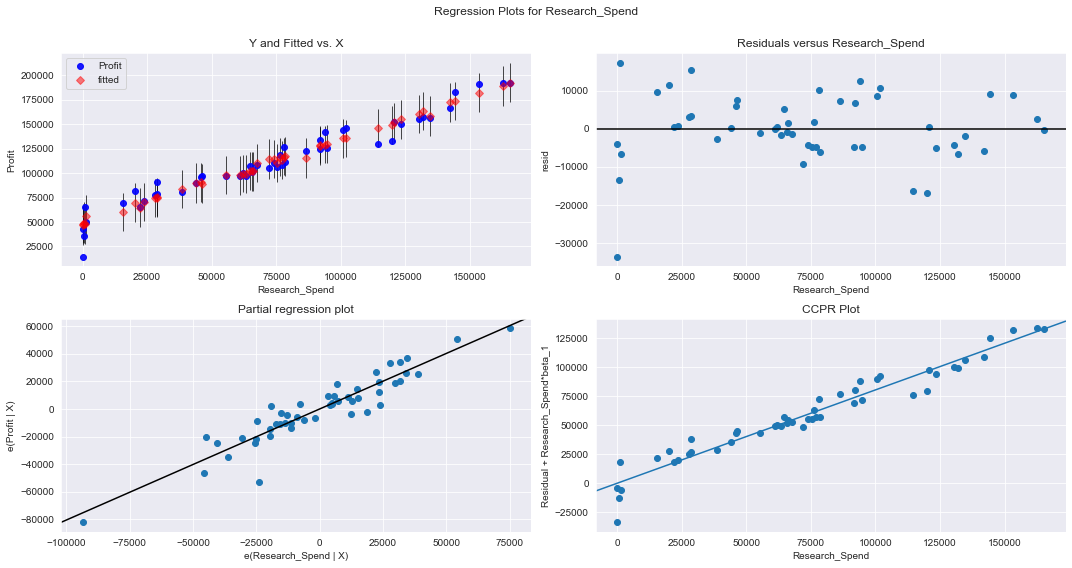

In [31]:
# For 'Research_Spend'
fig = plt.figure(figsize =(15,8))
fig = sm.graphics.plot_regress_exog(model0 , 'Research_Spend' , fig=fig)
plt.show()

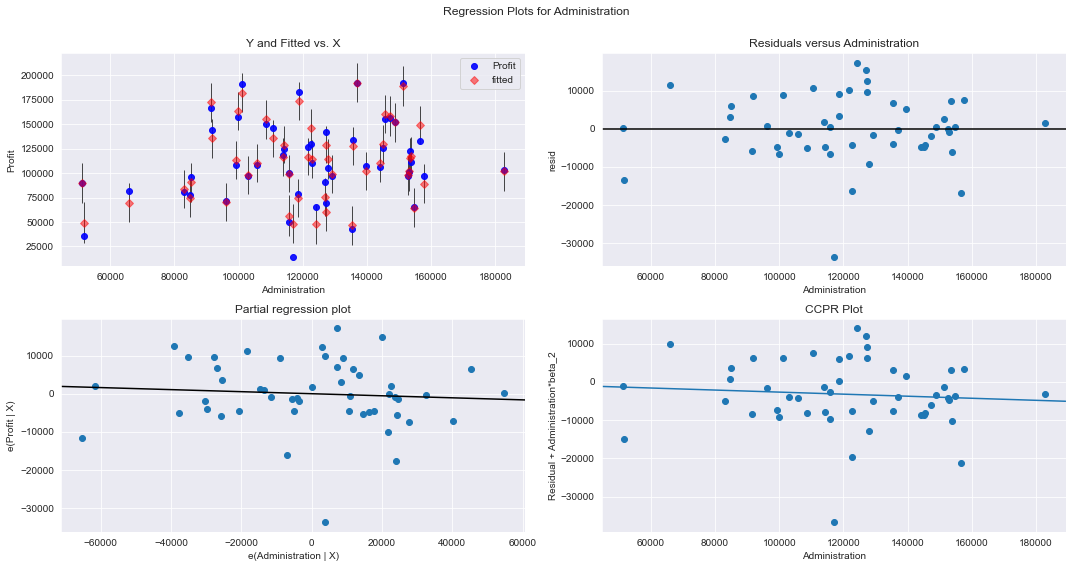

In [32]:
# For 'Administration'
fig = plt.figure(figsize =(15,8))
fig = sm.graphics.plot_regress_exog(model0 , 'Administration' , fig=fig)
plt.show()

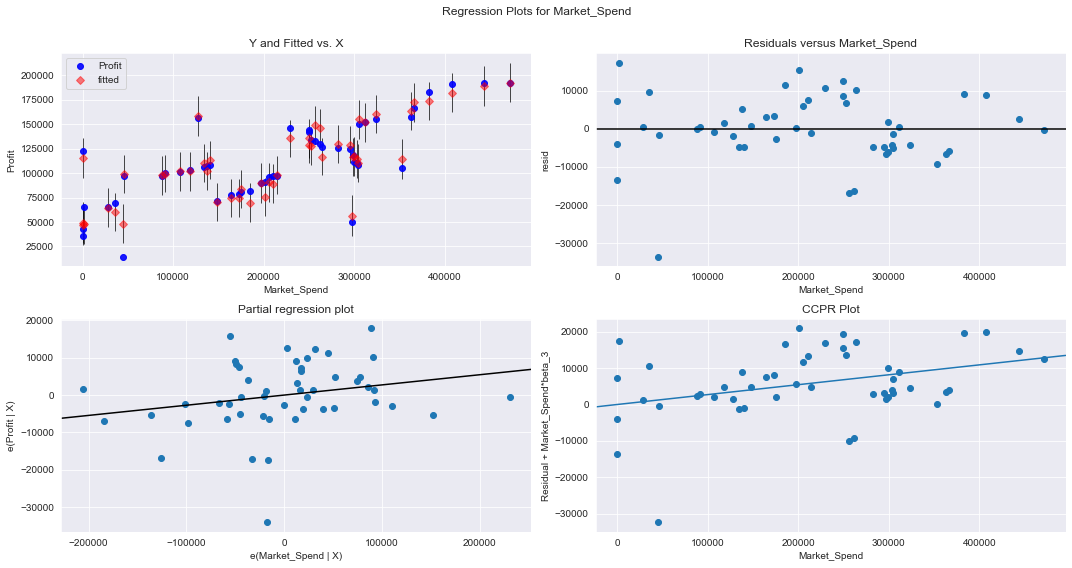

In [33]:
# For 'Market_Spend'
fig = plt.figure(figsize =(15,8))
fig = sm.graphics.plot_regress_exog(model0 , 'Market_Spend' , fig=fig)
plt.show()

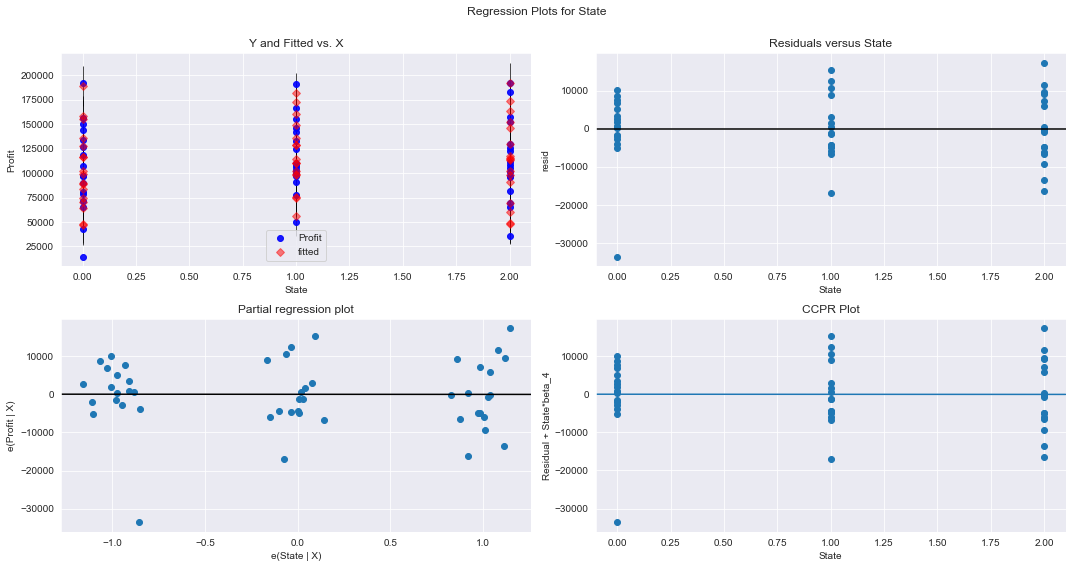

In [34]:
# For 'State'
fig = plt.figure(figsize =(15,8))
fig = sm.graphics.plot_regress_exog(model0 , 'State' , fig=fig)
plt.show()

In [35]:
data2.head()

,Research_Spend,Administration,Market_Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


+ From above PRP's , we can observe that feature 'Administration' and 'State' are not Important for our Model

#### Elemination of Features from our Model from above Tests

+ From R-Square Value of SLR model that we Build we can say that 'Administration' & 'State' column are making No change
+ And PRP we can observe that feature 'Administration' and 'State' are not Important for our Model.                                                                                                                                                             
+ So we Decide to remove this two Features from our Model

### Cook's Distance  

In [36]:
model0_influence = model0.get_influence()
(c,_) = model0_influence.cooks_distance

In [37]:
c.max()

0.3060281954699332

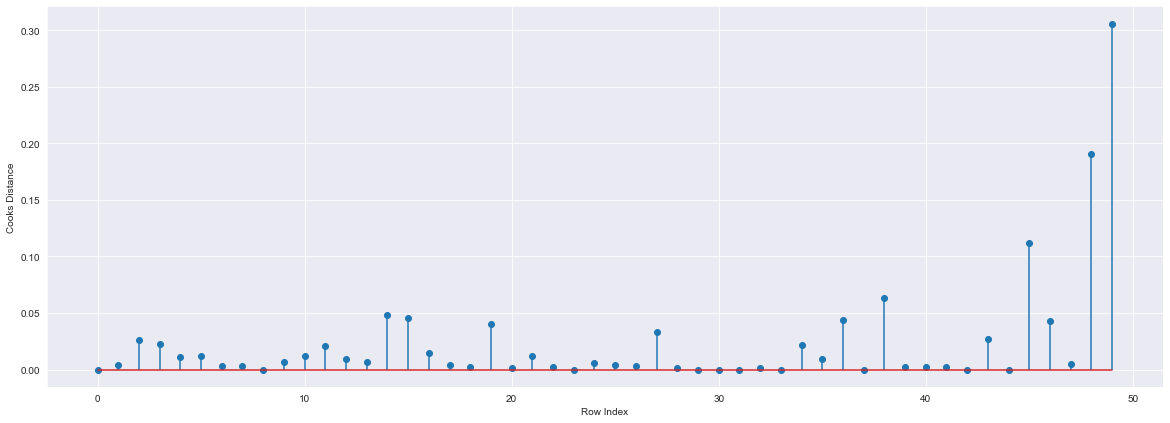

In [38]:
# Plot the influencers value using Stem Plot
fig = plt.subplots(figsize = (20,7))
plt.stem(np.arange(len(data2)) , np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [39]:
# Leverage Cut-off
k= data2.shape[1]
n = data2.shape[0]
leverage_cutoff = 3*((k+1)/n)
leverage_cutoff

0.36

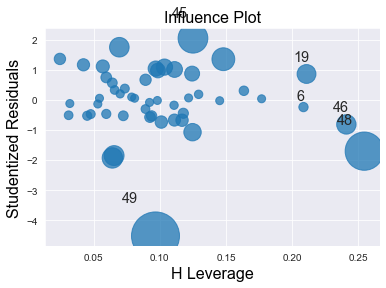

In [40]:
from statsmodels.graphics.regressionplots import influence_plot

influence_plot(model0)
plt.show()

+ Leverage Cutoff for our data is 0.36 as we can see in Influence Plot that there are no Influence Points and we can conform it by Cook's Distance also i.e. Maximum Cook's Distance is 0.36 < 1 which implies that there is no outliers in our data set.

# Improving The Model

### Load the data

In [41]:
data_final = pd.read_csv('50_Startups.csv')
data_final.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [42]:
# We drop two columns that we dont use for Model Building
data_final.drop(['Administration' , 'State'] , axis=1 , inplace = True)
data_final.head()

,R&D Spend,Marketing Spend,Profit
0,165349.20,471784.10,192261.83
1,162597.70,443898.53,191792.06
2,153441.51,407934.54,191050.39
3,144372.41,383199.62,182901.99
4,142107.34,366168.42,166187.94


In [43]:
#Rename the column
data_final = data_final.rename({'R&D Spend':'Research_Spend' , 'Marketing Spend':'Market_Spend'} , axis = 1)
data_final.head()

,Research_Spend,Market_Spend,Profit
0,165349.20,471784.10,192261.83
1,162597.70,443898.53,191792.06
2,153441.51,407934.54,191050.39
3,144372.41,383199.62,182901.99
4,142107.34,366168.42,166187.94


In [44]:
# Model Building
model1 = smf.ols('Profit~Research_Spend+Market_Spend' , data=data_final).fit()

In [45]:
#Model Summary
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Tue, 07 Jun 2022   Prob (F-statistic):           2.16e-31
Time:                        15:17:48   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
Research_Spend     0.7966      0.041     19.266      0.000       0.713       0.880
Market_Spend       0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
#Storing R-Square value in DataFrame
r_square_value.loc[1] = ['Model1' , model1.rsquared , model1.aic]
r_square_value

,Model,R_Square_value,AIC
0,Model0,0.950746,1060.771285
1,Model1,0.950450,1057.070772


### Cook's Distance for New Model

In [47]:
model1_influence = model1.get_influence()
(c , _) =  model1_influence.cooks_distance

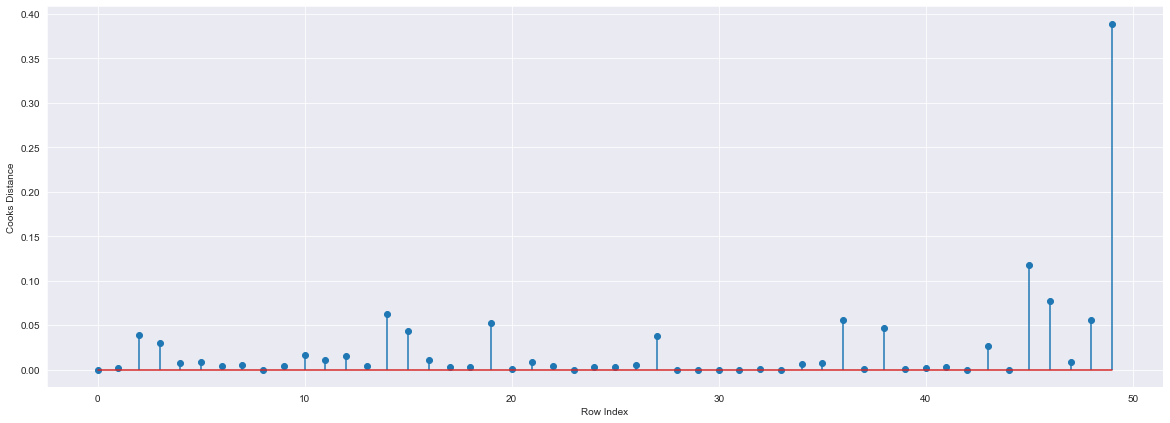

In [48]:
# Plot the influence value using Stem Plot
fig = plt.subplots(figsize = (20,7))
plt.stem(np.arange(len(data_final)) , np.round(c , 3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [49]:
# Leverage cutoff
k = data_final.shape[1]
n = data_final.shape[0]
leverage_cutoff = 3*((k+1)/n)
leverage_cutoff

0.24

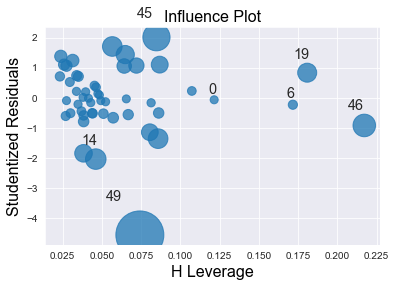

In [50]:
# Influence Plot
influence_plot(model1)
plt.show()

+ There is no Outliers present in our dataset

## R-Square for different Models

In [51]:
r_square_value['Features_used'] = [data2.shape[1]-1,data_final.shape[1]-1]

In [52]:
r_square_value

,Model,R_Square_value,AIC,Features_used
0,Model0,0.950746,1060.771285,4
1,Model1,0.950450,1057.070772,2


## Transformation of Data

In [53]:
# Assign Value containing 0 as value
data2[data2['Research_Spend']==0] = data2['Research_Spend'].mean()

In [54]:
data2.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
Research_Spend,0.191684,-0.601983
Administration,-0.378768,-0.239681
Market_Spend,0.006241,-0.649021
State,4.841323,22.330729
Profit,0.348027,-0.302705


+ As we can see that skewness is present in Administration and Research_Spend we use transformation for both the columns

In [55]:
#1st Transformation i.e. Standardize the data set
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss = ss.fit_transform(data2)
data_stand = pd.DataFrame(data = ss, columns=['Research_Spend', 'Administration', 'Market_Spend', 'State', 'Profit'])
data_stand.head()

,Research_Spend,Administration,Market_Spend,State,Profit
0,2.068016,0.605027,2.189271,-0.204058,2.125933
1,2.003850,1.101312,1.953299,-0.204196,2.113202
2,1.790325,-0.620356,1.648967,-0.204127,2.093102
3,1.578830,-0.019654,1.439656,-0.204058,1.872273
4,1.526008,-0.954660,1.295536,-0.204127,1.419307


In [56]:
data_stand.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
Research_Spend,0.191684,-0.601983
Administration,-0.378768,-0.239681
Market_Spend,0.006241,-0.649021
State,4.841323,22.330729
Profit,0.348027,-0.302705


In [57]:
#2nd Transformation i.e. Normalize the data set
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler(feature_range = (0.1 , 1.1))
minmax = minmax.fit_transform(data2)
data_norm = pd.DataFrame(data = minmax , columns = ['Research_Spend', 'Administration', 'Market_Spend', 'State', 'Profit'])
data_norm.head()

,Research_Spend,Administration,Market_Spend,State,Profit
0,1.100000,0.751744,1.100000,0.100027,1.100000
1,1.083305,0.861972,1.040893,0.100000,1.097000
2,1.027748,0.479579,0.964664,0.100014,1.092264
3,0.972719,0.612998,0.912235,0.100027,1.040226
4,0.958975,0.405328,0.876136,0.100014,0.933488


In [58]:
# 3rd Transformation is Squareroot Transform
data_norm.insert(len(data_norm.columns), 'Res_sqrt',
         np.sqrt(data_norm.iloc[:,0]))
data_norm.insert(len(data_norm.columns), 'Adm_sqrt',
         np.sqrt(data_norm.iloc[:,1]))
data_norm.head()

,Research_Spend,Administration,Market_Spend,State,Profit,Res_sqrt,Adm_sqrt
0,1.100000,0.751744,1.100000,0.100027,1.100000,1.048809,0.867032
1,1.083305,0.861972,1.040893,0.100000,1.097000,1.040819,0.928424
2,1.027748,0.479579,0.964664,0.100014,1.092264,1.013779,0.692516
3,0.972719,0.612998,0.912235,0.100027,1.040226,0.986265,0.782942
4,0.958975,0.405328,0.876136,0.100014,0.933488,0.979273,0.636654


In [59]:
data_norm.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
Research_Spend,0.191684,-0.601983
Administration,-0.378768,-0.239681
Market_Spend,0.006241,-0.649021
State,4.841323,22.330729
Profit,0.348027,-0.302705
Res_sqrt,-0.387860,-0.311548
Adm_sqrt,-0.990030,0.993125


## Model Building using SquareRoot Transformed Data

In [60]:
# Model Building
model_sqrt = smf.ols('Profit ~ Res_sqrt+Adm_sqrt+Market_Spend+State' , data=data_norm).fit()
model_sqrt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     179.0
Date:                Tue, 07 Jun 2022   Prob (F-statistic):           5.18e-27
Time:                        15:17:49   Log-Likelihood:                 72.018
No. Observations:                  50   AIC:                            -134.0
Df Residuals:                      45   BIC:                            -124.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.2032      0.052     -3.934      0.000      -0.307      -0.099
Res_sqrt         1.0885      0.068     16.072      0.000       0.952       1.225
Adm_sqrt        -0.0301      0.063     -0.481      0.633      -0.156       0.096
Market_Spend     0.1263      0.049      2.583      0.013       0.028       0.225
State           -0.2486      0.050     -4.923      0.000      -0.350      -0.147
==============================================================================
Omnibus:                        5.019   Durbin-Watson:                   1.321
Prob(Omnibus):                  0.081   Jarque-Bera (JB):                3.927
Skew:                           0.638   Prob(JB):                        0.140
Kurtosis:                       3.506   Cond. No.                         16.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
# 4th Transformation is Logerithmic
data_norm.insert(len(data_norm.columns), 'Res_log',
         np.log(data_norm.iloc[:,0]))
data_norm.insert(len(data_norm.columns), 'Adm_log',
         np.log(data_norm.iloc[:,1]))
data_norm.head()

,Research_Spend,Administration,Market_Spend,State,Profit,Res_sqrt,Adm_sqrt,Res_log,Adm_log
0,1.100000,0.751744,1.100000,0.100027,1.100000,1.048809,0.867032,0.095310,-0.285360
1,1.083305,0.861972,1.040893,0.100000,1.097000,1.040819,0.928424,0.080016,-0.148533
2,1.027748,0.479579,0.964664,0.100014,1.092264,1.013779,0.692516,0.027370,-0.734847
3,0.972719,0.612998,0.912235,0.100027,1.040226,0.986265,0.782942,-0.027660,-0.489393
4,0.958975,0.405328,0.876136,0.100014,0.933488,0.979273,0.636654,-0.041890,-0.903059


In [62]:
data_norm.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
Research_Spend,0.191684,-0.601983
Administration,-0.378768,-0.239681
Market_Spend,0.006241,-0.649021
State,4.841323,22.330729
Profit,0.348027,-0.302705
Res_sqrt,-0.387860,-0.311548
Adm_sqrt,-0.990030,0.993125
Res_log,-1.091103,0.996073
Adm_log,-1.802733,3.927564


## Model Building using Logerithmic Transformed Data

In [63]:
# Model Building
model_log = smf.ols('Profit ~ Res_log+Adm_log+Market_Spend+State' , data=data_norm).fit()
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     88.31
Date:                Tue, 07 Jun 2022   Prob (F-statistic):           1.04e-20
Time:                        15:17:49   Log-Likelihood:                 55.833
No. Observations:                  50   AIC:                            -101.7
Df Residuals:                      45   BIC:                            -92.11
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.7227      0.053     13.646      0.000       0.616       0.829
Res_log          0.3023      0.028     10.716      0.000       0.246       0.359
Adm_log         -0.0011      0.027     -0.039      0.969      -0.056       0.054
Market_Spend     0.2268      0.063      3.583      0.001       0.099       0.354
State           -0.2320      0.069     -3.364      0.002      -0.371      -0.093
==============================================================================
Omnibus:                        7.304   Durbin-Watson:                   1.057
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                6.266
Skew:                           0.787   Prob(JB):                       0.0436
Kurtosis:                       3.729   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
# 5th Transformation is Box-Cox Transformation
from scipy.stats import boxcox

data_norm.insert(len(data_norm.columns), 'Res_boxcox', 
              boxcox(data_norm.iloc[:, 0])[0])
data_norm.insert(len(data_norm.columns), 'Adm_boxcox', 
              boxcox(data_norm.iloc[:, 1])[0])
data_norm.head()

,Research_Spend,Administration,Market_Spend,State,Profit,Res_sqrt,Adm_sqrt,Res_log,Adm_log,Res_boxcox,Adm_boxcox
0,1.100000,0.751744,1.100000,0.100027,1.100000,1.048809,0.867032,0.095310,-0.285360,0.098704,-0.241061
1,1.083305,0.861972,1.040893,0.100000,1.097000,1.040819,0.928424,0.080016,-0.148533,0.082399,-0.135876
2,1.027748,0.479579,0.964664,0.100014,1.092264,1.013779,0.692516,0.027370,-0.734847,0.027645,-0.485620
3,0.972719,0.612998,0.912235,0.100027,1.040226,0.986265,0.782942,-0.027660,-0.489393,-0.027382,-0.368697
4,0.958975,0.405328,0.876136,0.100014,0.933488,0.979273,0.636654,-0.041890,-0.903059,-0.041256,-0.547787


In [65]:
data_norm.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
Research_Spend,0.191684,-0.601983
Administration,-0.378768,-0.239681
Market_Spend,0.006241,-0.649021
State,4.841323,22.330729
Profit,0.348027,-0.302705
Res_sqrt,-0.387860,-0.311548
Adm_sqrt,-0.990030,0.993125
Res_log,-1.091103,0.996073
Adm_log,-1.802733,3.927564
Res_boxcox,-0.105359,-0.543807


## Model Build Using Boxcox Transformation

In [66]:
# Model Building
model_boxcox = smf.ols('Profit ~ Res_boxcox+Adm_boxcox+Market_Spend+State' , data=data_norm).fit()
model_boxcox.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     237.5
Date:                Tue, 07 Jun 2022   Prob (F-statistic):           1.26e-29
Time:                        15:17:49   Log-Likelihood:                 78.724
No. Observations:                  50   AIC:                            -147.4
Df Residuals:                      45   BIC:                            -137.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.9029      0.039     23.206      0.000       0.824       0.981
Res_boxcox       0.6731      0.036     18.799      0.000       0.601       0.745
Adm_boxcox      -0.0323      0.044     -0.729      0.470      -0.121       0.057
Market_Spend     0.0914      0.044      2.067      0.044       0.002       0.181
State           -0.2487      0.044     -5.639      0.000      -0.338      -0.160
==============================================================================
Omnibus:                        1.296   Durbin-Watson:                   1.575
Prob(Omnibus):                  0.523   Jarque-Bera (JB):                1.028
Skew:                           0.349   Prob(JB):                        0.598
Kurtosis:                       2.921   Cond. No.                         12.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
r_value = {'Model':['Model_sqrt' , 'Model_log' , 'Model_boxcox'] , 
          'R_Squared':[model_sqrt.rsquared, model_log.rsquared , model_boxcox.rsquared],
          'AIC':[model_sqrt.aic , model_log.aic , model_boxcox.aic]}
r_square_value = pd.DataFrame(r_value)
r_square_value

,Model,R_Squared,AIC
0,Model_sqrt,0.940853,-134.035467
1,Model_log,0.886998,-101.666924
2,Model_boxcox,0.954770,-147.448811
